In [ ]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import utils as np_utils
import keras
import keras.utils
from keras import utils as np_utils

In [ ]:
#load data

df_test = pd.read_csv("USCensusTest.csv")
df_train = pd.read_csv("USCensusTraining.csv")
df_train

,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,41,Private,112507,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K.
24996,19,Private,236940,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K.
24997,33,Private,278514,HS-grad,9,Divorced,Craft-repair,Own-child,White,Female,0,0,42,United-States,<=50K.
24998,21,?,433330,Some-college,10,Never-married,?,Unmarried,White,Male,0,0,40,United-States,<=50K.


#EDA

In [ ]:
df_train.shape

(25000, 15)

In [ ]:
#Checking the values stored in categorical variables
dtp = pd.DataFrame(df_train.dtypes).reset_index()
for i in dtp.loc[dtp[0]=='object','index']:
    vc = df_train[i].value_counts(normalize=True)
    print("For - ",i,"\n")
    print(vc,"\n")
#Note: Categories that have a frequency < 0.01 can be clubbed together as they are a very small representation of our data

For -  workclass 

Private             0.69540
Self-emp-not-inc    0.07912
Local-gov           0.06496
?                   0.05596
State-gov           0.03972
Self-emp-inc        0.03428
Federal-gov         0.03000
Without-pay         0.00036
Never-worked        0.00020
Name: workclass, dtype: float64 

For -  education 

HS-grad         0.32480
Some-college    0.22388
Bachelors       0.16560
Masters         0.05200
Assoc-voc       0.04236
11th            0.03636
Assoc-acdm      0.03204
10th            0.02884
7th-8th         0.01964
Prof-school     0.01720
9th             0.01576
12th            0.01292
Doctorate       0.01260
5th-6th         0.00976
1st-4th         0.00480
Preschool       0.00144
Name: education, dtype: float64 

For -  marital-status 

Married-civ-spouse       0.45764
Never-married            0.32900
Divorced                 0.13740
Separated                0.03144
Widowed                  0.03076
Married-spouse-absent    0.01312
Married-AF-spouse        0.00064
Nam

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'demogweight'),
 Text(2.5, 0, 'education-num'),
 Text(3.5, 0, 'capital-gain'),
 Text(4.5, 0, 'capital-loss'),
 Text(5.5, 0, 'hours-per-week')]

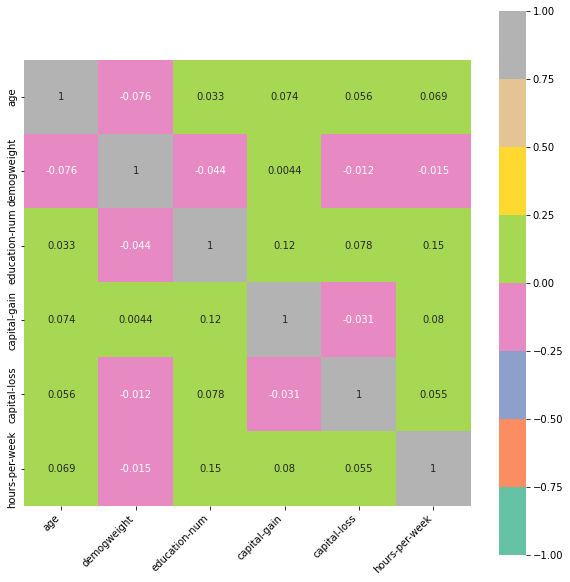

In [ ]:

data_num = df_train
df_train = df_train.drop('income',axis = 1)

corr = data_num.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,cmap=sns.color_palette("Set2", as_cmap=True),
    #cmap=sns.diverging_palette(1, 220, n=200),
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

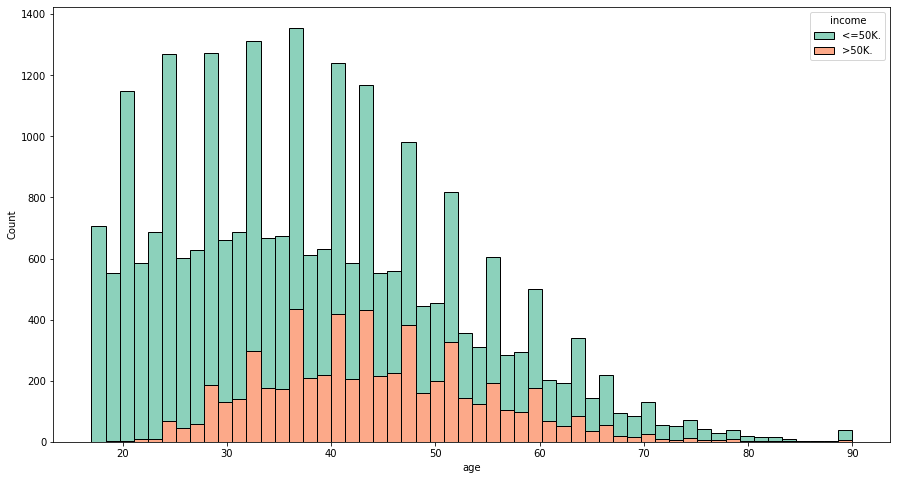

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=data_num, x="age", hue="income", multiple="stack", palette="Set2")

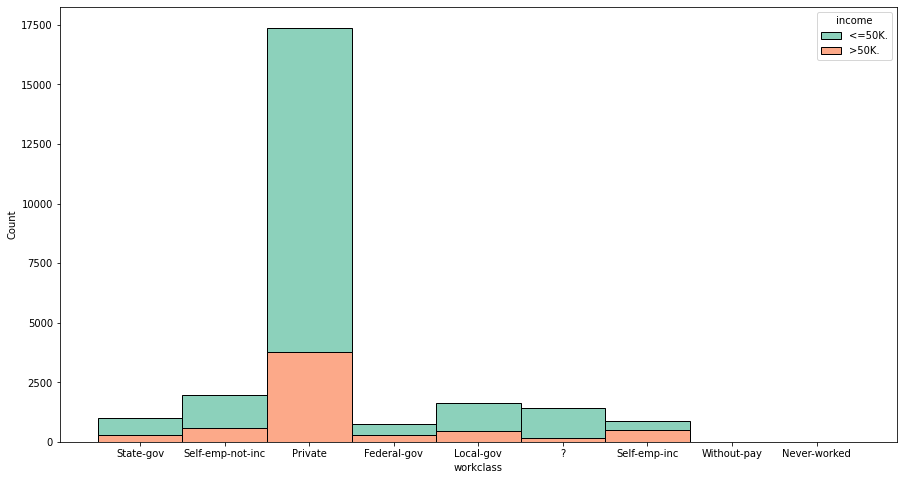

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=data_num, x="workclass", hue="income", multiple="stack", palette="Set2")

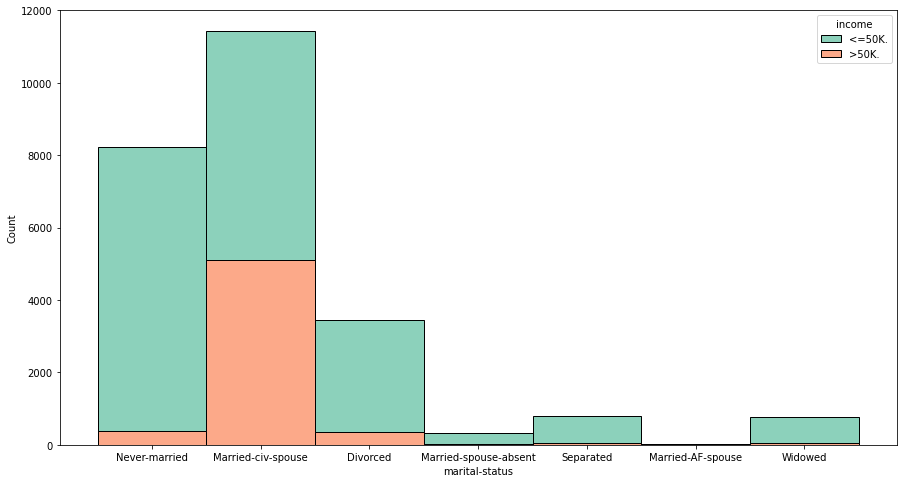

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=data_num, x="marital-status", hue="income", multiple="stack", palette="Set2")

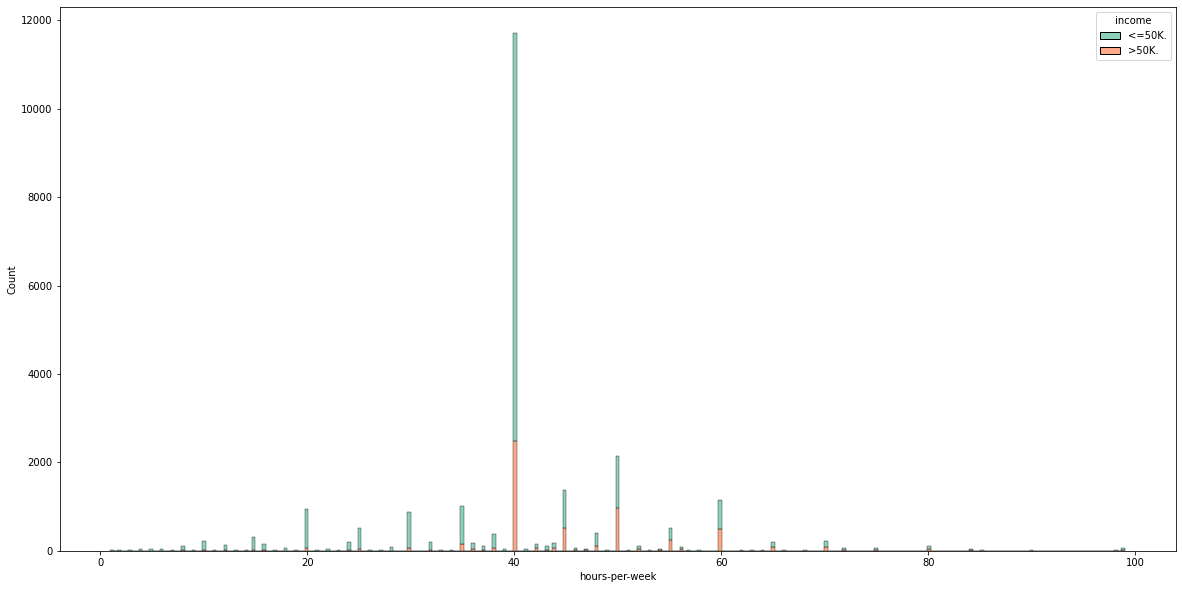

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(data=data_num, x="hours-per-week", hue="income",  multiple="stack",palette="Set2")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

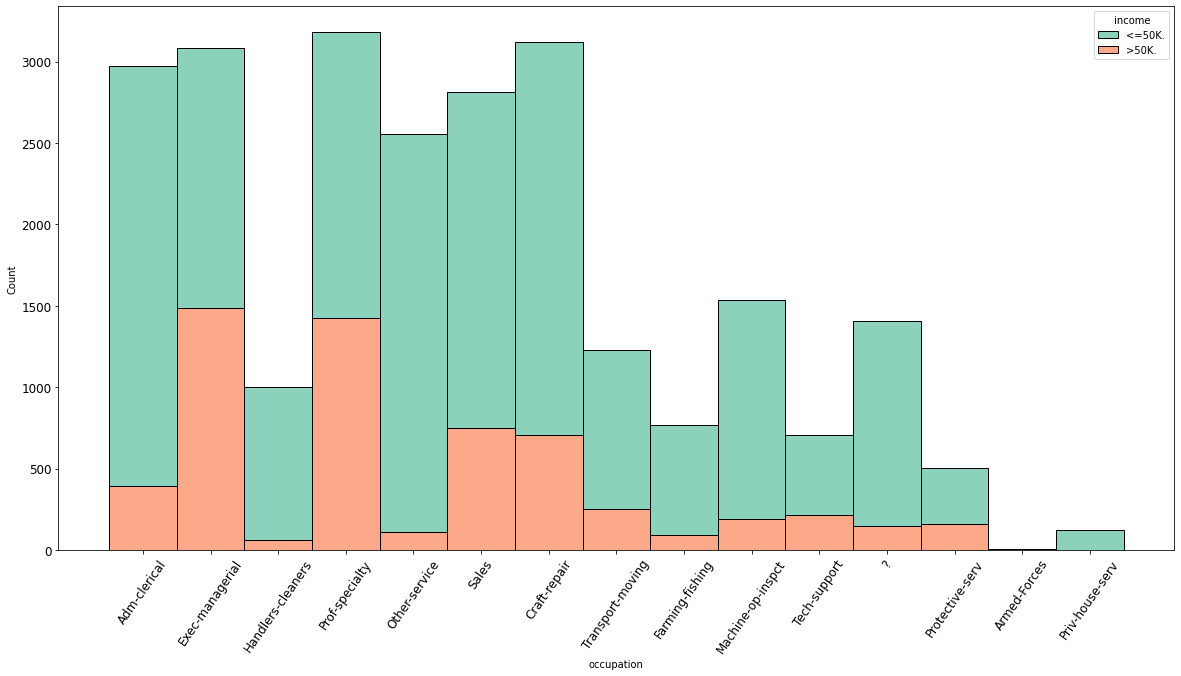

In [ ]:


plt.figure(figsize=(20,10))
sns.histplot(data=data_num, x="occupation", hue="income",  multiple="stack",palette="Set2")
plt.xticks(rotation=55)
plt.yticks(rotation=0)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

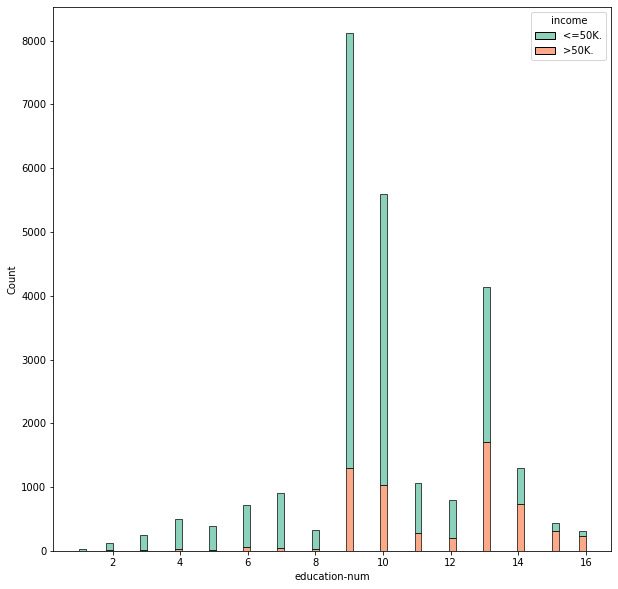

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=data_num, x="education-num", hue="income", multiple="stack",palette="Set2")

(0.0, 26000.0)

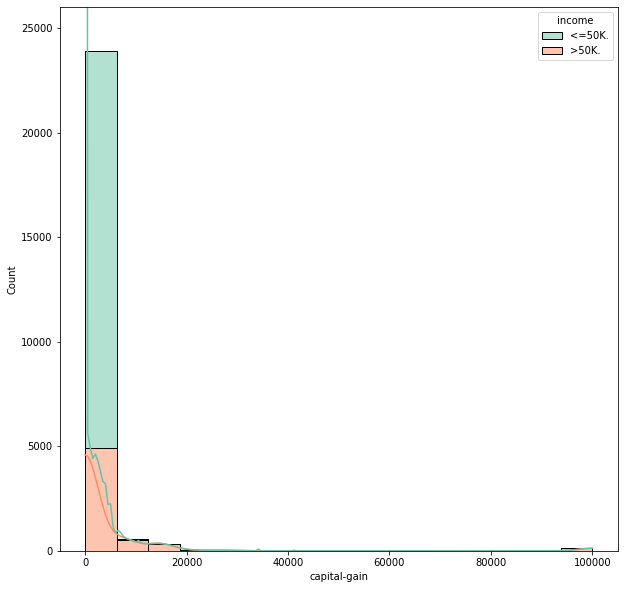

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=data_num, x="capital-gain", hue="income", multiple="stack",kde =True,palette="Set2")
plt.ylim(0,26000)


(0.0, 26000.0)

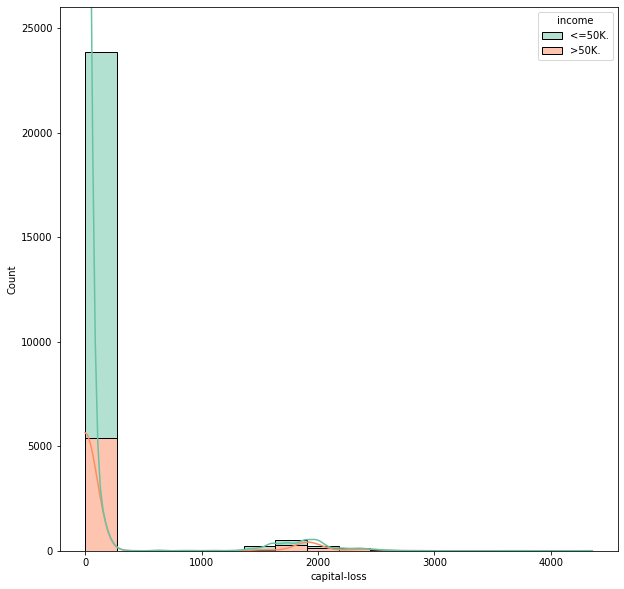

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=data_num, x="capital-loss", hue="income",kde=True, multiple="stack",palette="Set2")
plt.ylim(0,26000)

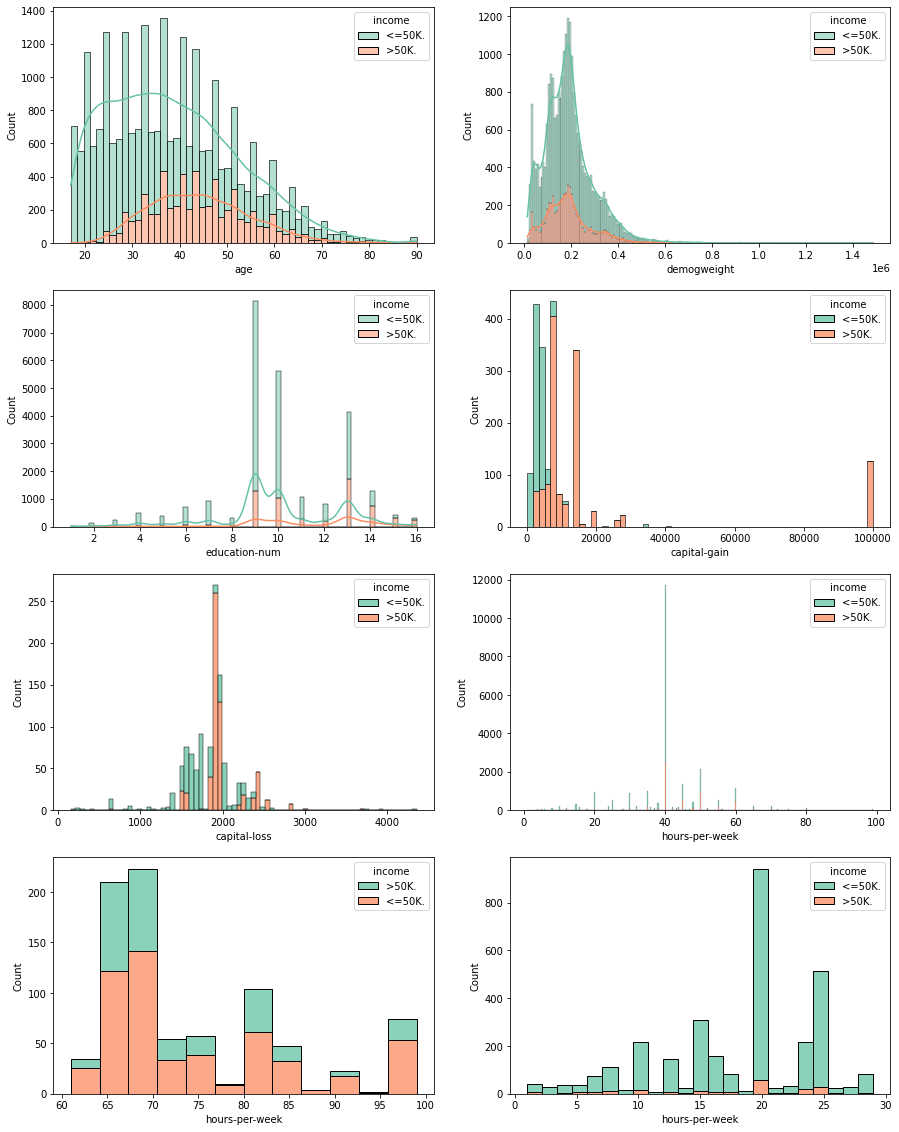

In [ ]:
# plotting numeric var together
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

sns.histplot(ax=axes[0,0],data=data_num, x="age", hue="income", multiple="stack", palette="Set2", kde=True)
sns.histplot(ax=axes[0,1],data=data_num, x="demogweight", hue="income", multiple="stack", palette="Set2", kde=True)
sns.histplot(ax=axes[1,0],data=data_num, x="education-num", hue="income", multiple="stack", palette="Set2", kde=True)
sns.histplot(ax=axes[1,1],data=data_num.loc[data_num['capital-gain']!=0], x="capital-gain", hue="income", multiple="stack", palette="Set2")
sns.histplot(ax=axes[2,0],data=data_num.loc[data_num['capital-loss']!=0], x="capital-loss", hue="income", multiple="stack", palette="Set2")
sns.histplot(ax=axes[2,1],data=data_num, x="hours-per-week",hue="income", multiple="stack", palette="Set2")
sns.histplot(ax=axes[3,0],data=data_num.loc[data_num['hours-per-week']>60], x="hours-per-week",hue="income", multiple="stack", palette="Set2")
sns.histplot(ax=axes[3,1],data=data_num.loc[data_num['hours-per-week']<30], x="hours-per-week",hue="income", multiple="stack", palette="Set2")


In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data_cat['occupation'],palette="Set2")
plt.xticks(rotation=55)
plt.yticks(rotation=0)

NameError: ignored

<Figure size 1080x576 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
        9000.]), <a list of 10 Text major ticklabel objects>)

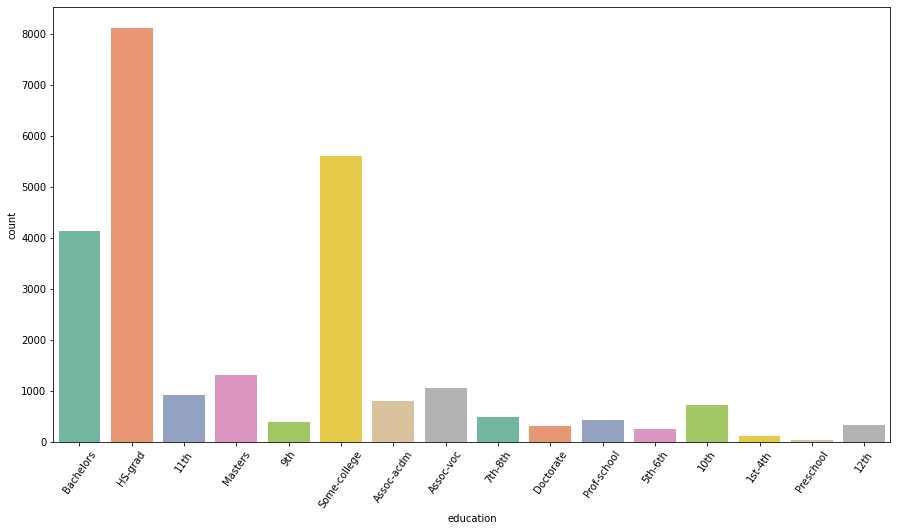

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data_cat['education'],palette="Set2")
plt.xticks(rotation=55)
plt.yticks(rotation=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000.]), <a list of 9 Text major ticklabel objects>)

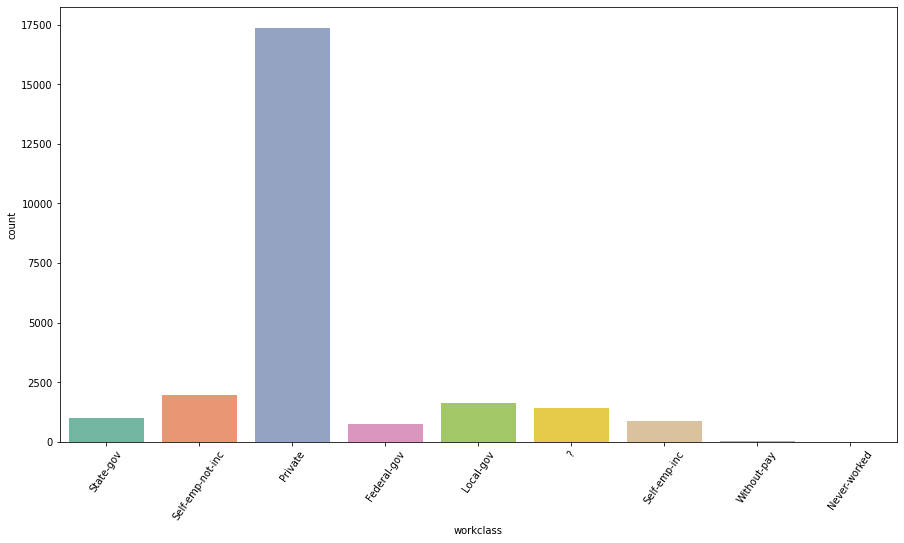

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data_cat['workclass'],palette="Set2")
plt.xticks(rotation=55)
plt.yticks(rotation=0)

#Data Cleaning and Encoding Categorical Variables

In [ ]:
#load data, clean it, and hot-encode categorical variables
df_test = pd.read_csv("USCensusTest.csv")
df_train = pd.read_csv("USCensusTraining.csv")


def clean_data(df):
    
    #Cleaning missing values 
    df.replace(to_replace='?',value='Missing',inplace=True)
    
    #Cleaning the categorical data types (accounting for less frequent data and missing values)
    #For workclass
    df.loc[df['workclass']=='Missing','workclass']='Others'
    df.loc[df['workclass']=='Without-pay','workclass']='Others'
    df.loc[df['workclass']=='Never-worked','workclass']='Others'
    
     
    #For occupation
    df.loc[df['occupation']=='Missing','occupation']='Others'
    df.loc[df['occupation']=='Armed-Forces','occupation']='Others'
    df.loc[df['occupation']=='Priv-house-serv','occupation']='Others'
    
    #For race
    df.loc[df['race']=='Missing','race']='Others'
    df.loc[df['race']=='Other','race']='Others'
    df.loc[df['race']=='Amer-Indian-Eskimo','race']='Others'
    
    #Encoding native country (as most people are from US)
    df.loc[df['native-country']=="United-States",'is_US']=1
    df.loc[df['native-country']!="United-States",'is_US']=0
    df = df.drop("native-country",axis = 1)
    
    # hot-encode categorical variables
    def hot_encode(df1, var):
        h_enc = pd.get_dummies(df1[var],prefix = var+'_',drop_first=True)
        df1 = df1.drop(var,axis=1)
        df1 = pd.concat([df1,h_enc],axis=1)
        return df1
    
    column_list =['workclass', 'relationship', 'marital-status', 'race','sex','occupation']#,'native-country']
    for i in column_list:
        df = hot_encode(df,i)
    
    
    # drop categorical education since we already have an education variable
    df = df.drop('education',axis = 1)
    
    # scale non-categorical variables
    scaler = preprocessing.MinMaxScaler()
    
    df1 = df[["age", "demogweight", "education-num", "capital-gain", "capital-loss", "hours-per-week"]]
    df1 = scaler.fit_transform(df1)
    df1 = pd.DataFrame(df1, columns=["age", "demogweight", "education-num", "capital-gain", "capital-loss", "hours-per-week"])
    
    # drop non-categorical variables
    df = df.drop('age',axis = 1)
    df = df.drop('demogweight',axis = 1)
    df = df.drop("education-num",axis = 1)
    df = df.drop("capital-gain",axis = 1)
    df = df.drop("capital-loss",axis = 1)
    df = df.drop("hours-per-week",axis = 1)
    
    
    
    # merge categorical and scaled non-categorical variables into a single df
    df = pd.concat([df1, df], axis=1)
    return df

df_train=clean_data(df_train)
df_test=clean_data(df_test)

income = pd.get_dummies(df_train.income, prefix='income',drop_first=True)
df_train = df_train.drop('income',axis = 1) #now that the income variable has been hot encoded, we can drop one of the them
df_train = df_train.join(income)

df_train.head()

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week,is_US,workclass__Local-gov,workclass__Others,workclass__Private,workclass__Self-emp-inc,workclass__Self-emp-not-inc,workclass__State-gov,relationship__Not-in-family,relationship__Other-relative,relationship__Own-child,relationship__Unmarried,relationship__Wife,marital-status__Married-AF-spouse,marital-status__Married-civ-spouse,marital-status__Married-spouse-absent,marital-status__Never-married,marital-status__Separated,marital-status__Widowed,race__Black,race__Others,race__White,sex__Male,occupation__Craft-repair,occupation__Exec-managerial,occupation__Farming-fishing,occupation__Handlers-cleaners,occupation__Machine-op-inspct,occupation__Other-service,occupation__Others,occupation__Prof-specialty,occupation__Protective-serv,occupation__Sales,occupation__Tech-support,occupation__Transport-moving,income_>50K.
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,1.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,1.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#ANN

In [ ]:
#split data into the predictors and target variables and create training and testing datasets
y = df_train['income_>50K.']
X = df_train.drop('income_>50K.', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
#X = X.astype(str)
X.head()

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week,is_US,workclass__Local-gov,workclass__Others,workclass__Private,workclass__Self-emp-inc,workclass__Self-emp-not-inc,workclass__State-gov,relationship__Not-in-family,relationship__Other-relative,relationship__Own-child,relationship__Unmarried,relationship__Wife,marital-status__Married-AF-spouse,marital-status__Married-civ-spouse,marital-status__Married-spouse-absent,marital-status__Never-married,marital-status__Separated,marital-status__Widowed,race__Black,race__Others,race__White,sex__Male,occupation__Craft-repair,occupation__Exec-managerial,occupation__Farming-fishing,occupation__Handlers-cleaners,occupation__Machine-op-inspct,occupation__Other-service,occupation__Others,occupation__Prof-specialty,occupation__Protective-serv,occupation__Sales,occupation__Tech-support,occupation__Transport-moving
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,1.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,1.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#=========ONLY RUN FOR MODEL SELECTION PURPOSES=========#

# FIND OPTIMAL NUMBER OF NEURONS
i = 19
while i < 30:
  i = i + 1
  model = Sequential()
  model.add(Dense(i, input_dim=X_train.shape[1], activation='relu', kernel_initializer='uniform'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit the keras model on the dataset
  model.fit(X_train, y_train, epochs=25, batch_size=12, verbose=0)
  # evaluate the keras model
  accuracy = model.evaluate(X_test, y_test, verbose=0)
  print("loss, accuracy for " + str(i)+ " nodes: " + str(accuracy))

loss, accuracy for 20 nodes: [0.31517404317855835, 0.852400004863739]
loss, accuracy for 21 nodes: [0.31616005301475525, 0.8506666421890259]
loss, accuracy for 22 nodes: [0.31644466519355774, 0.8500000238418579]
loss, accuracy for 23 nodes: [0.311987042427063, 0.8537333607673645]
loss, accuracy for 24 nodes: [0.31665244698524475, 0.8514666557312012]
loss, accuracy for 25 nodes: [0.31158769130706787, 0.8503999710083008]
loss, accuracy for 26 nodes: [0.3116409182548523, 0.8533333539962769]
loss, accuracy for 27 nodes: [0.31528040766716003, 0.8526666760444641]
loss, accuracy for 28 nodes: [0.316349595785141, 0.8501333594322205]
loss, accuracy for 29 nodes: [0.31355419754981995, 0.8541333079338074]
loss, accuracy for 30 nodes: [0.3112846910953522, 0.8514666557312012]


In [ ]:
# THIS IS THE MAIN MODEL
# THE OPTIMAL NUMBER OF NODES IS 23

# define the model
model = Sequential()
model.add(Dense(23, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=30, batch_size=12, verbose=1)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/30
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3904 - accuracy: 0.8151
Epoch 2/30
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3521 - accuracy: 0.8344
Epoch 3/30
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3380 - accuracy: 0.8449
Epoch 4/30
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3312 - accuracy: 0.8479
Epoch 5/30
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3263 - accuracy: 0.8493
Epoch 6/30
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3239 - accuracy: 0.8511
Epoch 7/30
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3233 - accuracy: 0.8510
Epoch 8/30
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3215 - accuracy: 0.8513
Epoch 9/30
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3217 - accuracy: 0.8526
Epoch 10/30
1459/1459 [==============================] - 3s 2ms/step - loss: 0.320

In [ ]:
# NOTE: I AM USING ONLY THE TRAINING VALUES FOR X BUT MAYBE WE SHOULD USE ALL THE VALUES?????

# sensitivity analysis
from tensorflow.keras import backend as K
import tensorflow as tf

n_cols = len(X_train.columns)

# get a list of means for each variable
means = [] 
for i in range(n_cols):
    means.append(X_train.iloc[:,[i]].mean())

means = np.array(means)
means = np.reshape(means, (1,n_cols))

#get the output resulting from using the mean as an input
layerIndex = 1
func = K.function([model.get_layer(index=0).input], model.get_layer(index=layerIndex).output)
layerOutput = func([means])  # input_data is a numpy array
mean_output = layerOutput

#ITERATE THROUGH THE MINIMUM VALUES
min_outputs = []
for i in range(n_cols):
    means[0,i] = X_train.iloc[:,[i]].min() #find the minimum value for variable i
    layerIndex = 1
    func = K.function([model.get_layer(index=0).input], model.get_layer(index=layerIndex).output)
    layerOutput = func([means])  # input_data is a numpy array
    output = layerOutput
    min_outputs.append(float(output-float(mean_output)))

#ITERATE THROUGH THE MAXIMUM VALUES AND SUBTRACT THE MEAN
max_outputs = []
for i in range(n_cols):
    means[0,i] = X_train.iloc[:,[i]].max() #find the maximum value for variable i
    layerIndex = 1
    func = K.function([model.get_layer(index=0).input], model.get_layer(index=layerIndex).output)
    layerOutput = func([means])  # input_data is a numpy array
    output = layerOutput
    max_outputs.append(float(output-float(mean_output)))

#NOW WE WILL TAKE THE DIFFERENCE BETWEEN THE MIN AND MAX VALUES
difference = []
for i in range(len(min_outputs)):
    x = max_outputs[i] - min_outputs[i]
    difference.append(float(x))

difference = pd.DataFrame(difference, columns=['Significance']) #convert array to dataframe
column_names = X_train.columns #get the names of the variables
column = pd.Index.to_frame(column_names) #convert to dataframe
column.columns = ['Variable'] #add column name
column.reset_index(drop=True, inplace=True) #reset index
var_sig = pd.concat([difference, column], axis=1) #merge with significance values
var_sig.sort_values(by=['Significance'], ascending=False, inplace=True) #sort by most significant

var_sig.head(40) #print the dataframe

,Significance,Variable
5,0.999728,hours-per-week
6,0.999580,is_US
7,0.999573,workclass__Local-gov
8,0.999567,workclass__Others
11,0.999263,workclass__Self-emp-not-inc
12,0.999228,workclass__State-gov
10,0.999175,workclass__Self-emp-inc
9,0.999174,workclass__Private
13,0.999005,relationship__Not-in-family
14,0.998950,relationship__Other-relative


In [ ]:
# PRINT A LIST OF OUR MODELS PREDICTIONS BASED ON THE TEST DATA

# retrain the model using more epochs to get max accuracy
# define the model
model = Sequential()
model.add(Dense(23, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=200, batch_size=12, verbose=1)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/200
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3975 - accuracy: 0.8146
Epoch 2/200
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3540 - accuracy: 0.8339
Epoch 3/200
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3407 - accuracy: 0.8442
Epoch 4/200
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3325 - accuracy: 0.8454
Epoch 5/200
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3281 - accuracy: 0.8481
Epoch 6/200
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3265 - accuracy: 0.8514
Epoch 7/200
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3243 - accuracy: 0.8514
Epoch 8/200
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3233 - accuracy: 0.8526
Epoch 9/200
1459/1459 [==============================] - 3s 2ms/step - loss: 0.3226 - accuracy: 0.8500
Epoch 10/200
1459/1459 [==============================] - 3s 2ms/step - l

In [ ]:
# now we get a list of predictions based on the testing data
predictions = model.predict(X_test) # get predictions
predictions_df = pd.DataFrame(predictions, columns=["Prediction"]) # convert to dataframe
for index, row in predictions_df.iterrows():
  if row["Prediction"] > 0.50:
    row["Prediction"] = 1
  else:
    row["Prediction"] = 0

# convert probability to 0 or 1
predictions = np.transpose(predictions)[0]  # transformation to get (n,)
# apply transformation to get binary values predictions with 0.5 as thresold
predictions = list(map(lambda x: 0 if x<0.5 else 1, predictions))

#export list as a .txt file
with open('Team5predictions.txt', 'w') as f:
    for item in predictions:
        f.write("%s\n" % item)

print(predictions)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 

In [ ]:
# CROSS VALIDATION MODEL EVALUATION

# Define the number of folds
num_folds = 5

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X_train, y_train):

  # define the model
  model = Sequential()
  model.add(Dense(23, input_dim=X_train.shape[1], activation='relu', kernel_initializer='uniform'))
  model.add(Dense(1, activation='sigmoid'))
  # compile the keras model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # fit the keras model on the dataset
  model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=0)

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Generate generalization metrics
  scores = model.evaluate(X_test, y_test, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.31322577595710754; accuracy of 85.29333472251892%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.3146476447582245; accuracy of 85.15999913215637%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.3126506507396698; accuracy of 85.18666625022888%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.31599050760269165; accuracy of 85.2400004863739%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.32210227847099304; accuracy of 84.35999751091003%
------------------------------------------------------------------------
Score per fold
----------------------------------------

# #d

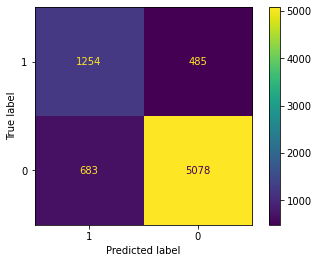

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

class_names = [1, 0]

titles_options = [
    ("Confusion matrix", None),
    ("Normalized confusion matrix", "true"),
]

cm = confusion_matrix(y_test, predictions_df, labels=class_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

disp.plot()

#e

[Text(0.5, 0, 'income_<=50K.'),
 Text(1.5, 0, 'income_>50K.'),
 Text(2.5, 0, 'occupation_?'),
 Text(3.5, 0, 'occupation_Adm-clerical'),
 Text(4.5, 0, 'occupation_Armed-Forces'),
 Text(5.5, 0, 'occupation_Craft-repair'),
 Text(6.5, 0, 'occupation_Exec-managerial'),
 Text(7.5, 0, 'occupation_Farming-fishing'),
 Text(8.5, 0, 'occupation_Handlers-cleaners'),
 Text(9.5, 0, 'occupation_Machine-op-inspct'),
 Text(10.5, 0, 'occupation_Other-service'),
 Text(11.5, 0, 'occupation_Priv-house-serv'),
 Text(12.5, 0, 'occupation_Prof-specialty'),
 Text(13.5, 0, 'occupation_Protective-serv'),
 Text(14.5, 0, 'occupation_Sales'),
 Text(15.5, 0, 'occupation_Tech-support'),
 Text(16.5, 0, 'occupation_Transport-moving')]

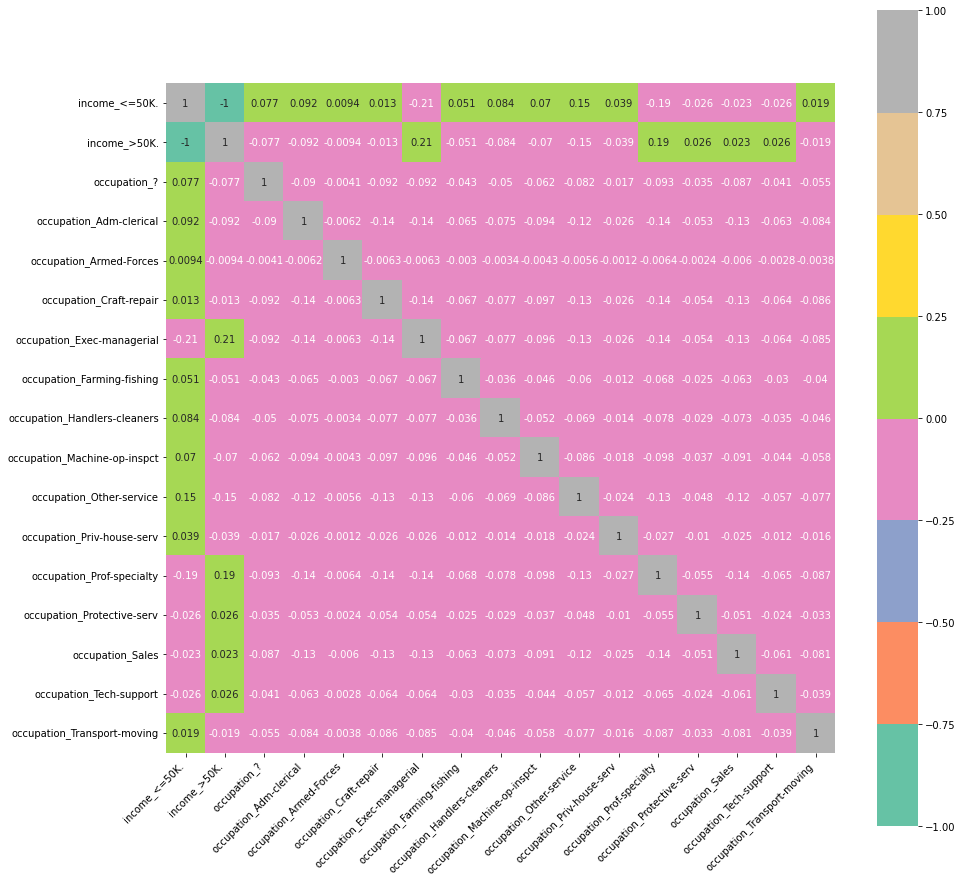

In [ ]:
#e. Which occupations are associated with predicted income over $50,000? Which education levels? Which ages? 
#   Is this intuitive? Construct graphs of the top three categorical predictors, and their relationship to predicted income.
#   Make sure you fine-tune these graphs, and arrange the graphs so that they are truly helpful.

#load data, clean it, and hot-encode categorical variables
df_test = pd.read_csv("USCensusTest.csv")
df_train = pd.read_csv("USCensusTraining.csv")

income = pd.get_dummies(df_train.income, prefix='income')
df_train = df_train.drop('income',axis = 1) 
df_train = df_train.join(income)

occupation = pd.get_dummies(df_train.occupation, prefix='occupation')
df_train = df_train.drop('occupation',axis = 1)
df_train = df_train.join(occupation)

data_num = df_train.drop(['age', 'workclass', 'demogweight', 'education', 'education-num',
       'marital-status', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],axis = 1)


corr = data_num.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,cmap=sns.color_palette("Set2", as_cmap=True),
    #cmap=sns.diverging_palette(1, 220, n=200),
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


[Text(0.5, 0, 'income_<=50K.'),
 Text(1.5, 0, 'income_>50K.'),
 Text(2.5, 0, 'educ_10th'),
 Text(3.5, 0, 'educ_11th'),
 Text(4.5, 0, 'educ_12th'),
 Text(5.5, 0, 'educ_1st-4th'),
 Text(6.5, 0, 'educ_5th-6th'),
 Text(7.5, 0, 'educ_7th-8th'),
 Text(8.5, 0, 'educ_9th'),
 Text(9.5, 0, 'educ_Assoc-acdm'),
 Text(10.5, 0, 'educ_Assoc-voc'),
 Text(11.5, 0, 'educ_Bachelors'),
 Text(12.5, 0, 'educ_Doctorate'),
 Text(13.5, 0, 'educ_HS-grad'),
 Text(14.5, 0, 'educ_Masters'),
 Text(15.5, 0, 'educ_Preschool'),
 Text(16.5, 0, 'educ_Prof-school'),
 Text(17.5, 0, 'educ_Some-college')]

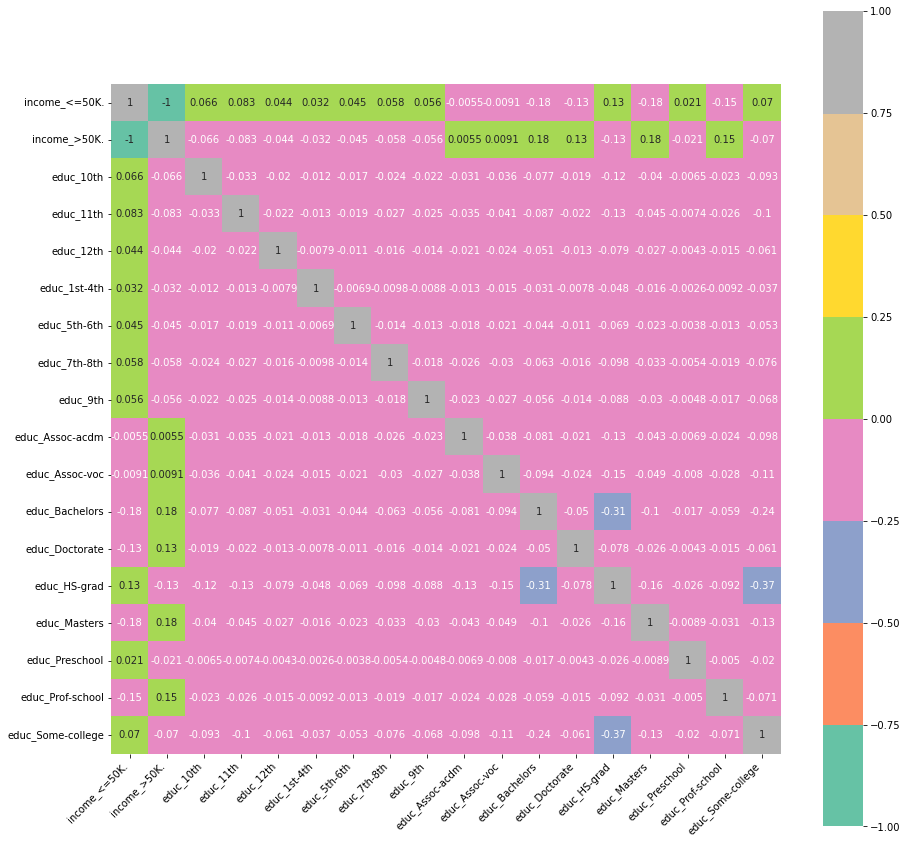

In [ ]:
#load data, clean it, and hot-encode categorical variables
df_test = pd.read_csv("USCensusTest.csv")
df_train = pd.read_csv("USCensusTraining.csv")

income = pd.get_dummies(df_train.income, prefix='income')
df_train = df_train.drop('income',axis = 1) 
df_train = df_train.join(income)

age = pd.get_dummies(df_train.education, prefix='educ')
df_train = df_train.drop('education',axis = 1)
df_train = df_train.join(age)

data_num = df_train.drop(['age', 'workclass', 'demogweight', 'occupation', 'education-num',
       'marital-status', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],axis = 1)


corr = data_num.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,cmap=sns.color_palette("Set2", as_cmap=True),
    #cmap=sns.diverging_palette(1, 220, n=200),
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


Text(0, 0.5, 'Count of People')

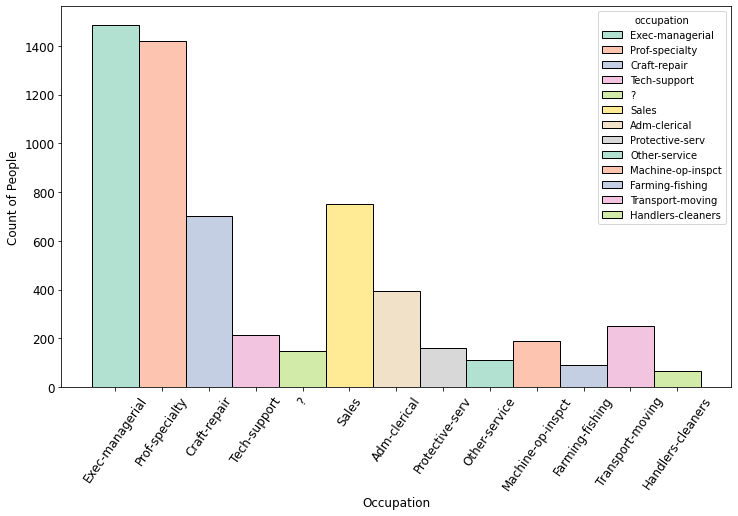

In [ ]:

#load data, clean it, and hot-encode categorical variables
df_test = pd.read_csv("USCensusTest.csv")
df_train = pd.read_csv("USCensusTraining.csv")

income = pd.get_dummies(df_train.income, prefix='income')
df_train = df_train.drop('income',axis = 1) 
df_train = df_train.join(income)


df_income_morethan50 =  df_train.loc[df_train['income_>50K.'] == 1]
fig_dims = (12, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df_income_morethan50 , x="occupation", hue= 'occupation',palette="Set2")

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.xticks(rotation=55)
plt.yticks(rotation=0)

plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Count of People', fontsize=12)


Text(93.75, 0.5, 'Count of People')

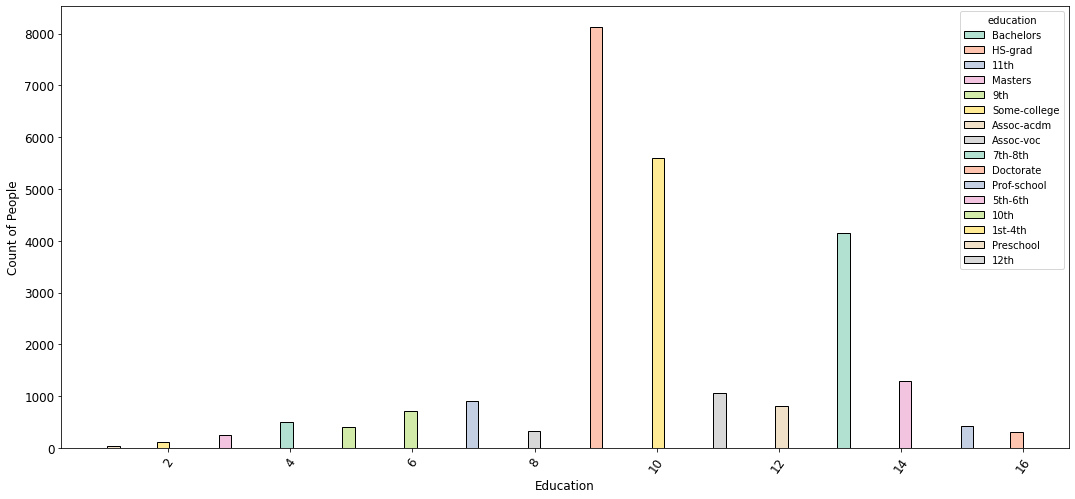

In [ ]:
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data= df_income_morethan50 , x="education-num", hue= 'education',palette="Set2")

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.xticks(rotation=55)
plt.yticks(rotation=0)
plt.tight_layout()

plt.xlabel('Education', fontsize=12)
plt.ylabel('Count of People', fontsize=12)

Text(0.5, 0, 'Count of People')

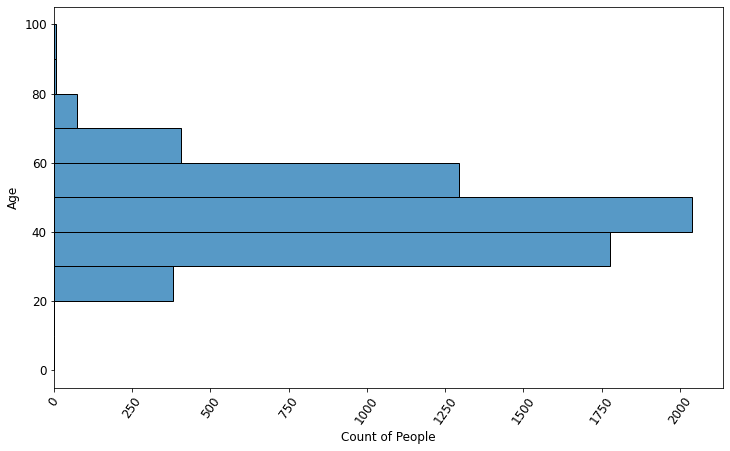

In [ ]:
fig_dims = (12, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df_income_morethan50 , y="age" ,palette="Set2", bins=[0, 10, 20, 30, 40, 50,60,70,80,90, 100])

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.xticks(rotation=55)
plt.yticks(rotation=0)

plt.ylabel('Age', fontsize=12)
plt.xlabel('Count of People', fontsize=12)

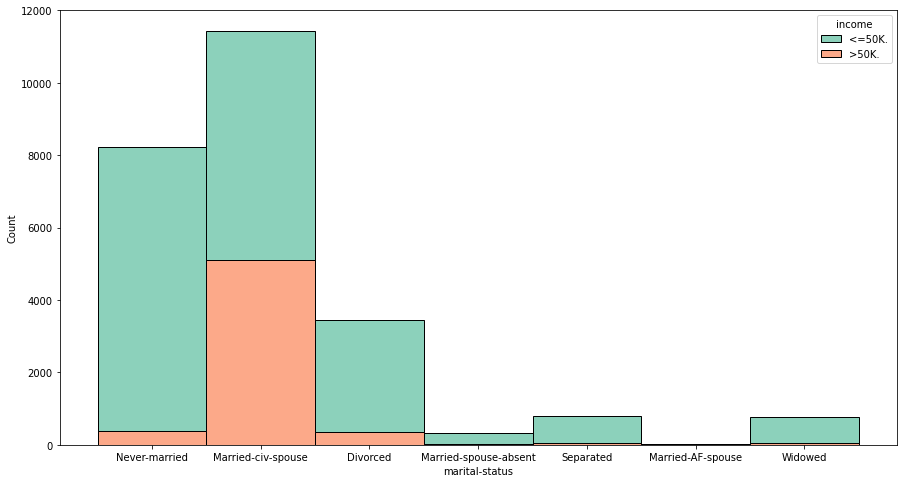

In [ ]:

data_num = df_train
df_train = df_train.drop('income',axis = 1)

plt.figure(figsize=(15,8))
sns.histplot(data=data_num, x="marital-status", hue="income", multiple="stack", palette="Set2")

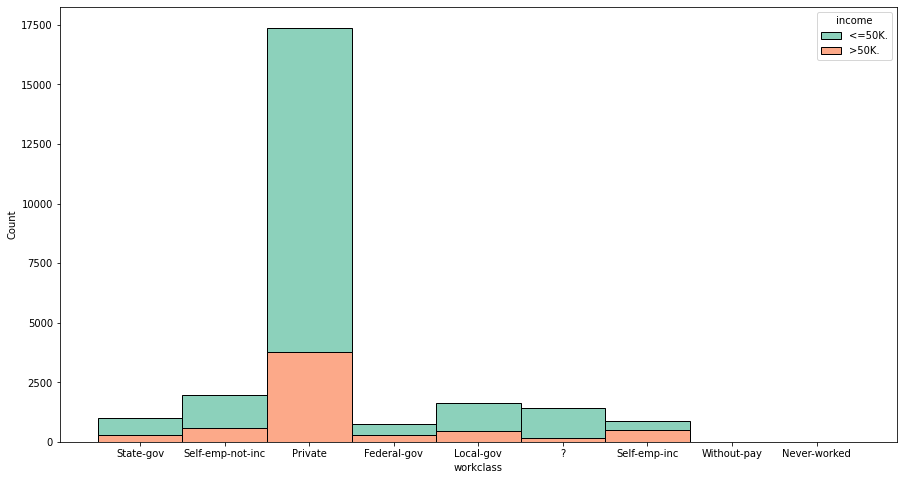

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=data_num, x="workclass", hue="income", multiple="stack", palette="Set2")